# Signal processing

In this script, we will extract basic features from multimodal timeseries, namely
- movement
- acoustics
- postural sway


## Folder settings

In [2]:
import os
import glob
import numpy as np
import pandas as pd

curfolder = os.getcwd()
print(curfolder)

MTfolder = 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata/'
ACfolder = 'E:\charade_experiment_WORKSPACE\\xdf_procedure\data\Data_processed\Data_trials\Audio_48'
BBfolder = 'E:\charade_experiment_WORKSPACE\\xdf_procedure\data\Data_processed\Data_trials\\'

MTfolder_processed = curfolder + '/TS_motiontracking/'
ACfolder_processed = curfolder + '/TS_acoustics/'

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\kadava\AppData\Local\Temp\ipykernel_33912\2997673939.py:10: SyntaxWarning: invalid escape sequence '\c'
  ACfolder = 'E:\charade_experiment_WORKSPACE\\xdf_procedure\data\Data_processed\Data_trials\Audio_48'
C:\Users\kadava\AppData\Local\Temp\ipykernel_33912\2997673939.py:11: SyntaxWarning: invalid escape sequence '\c'
  BBfolder = 'E:\charade_experiment_WORKSPACE\\xdf_procedure\data\Data_processed\Data_trials\\'


e:\FLESH_ContinuousBodilyEffort\TS_processing


# Extraction of MT features - kinematics

Note that y and z dimensions are swapped (such that z is vertical)

In [3]:
MTtotrack = glob.glob(MTfolder + '*/P*/*', recursive=True)


# get rid of all the folders that are not the ones we want to track, like .sto files
MTtotrack = [x for x in MTtotrack if 'sto' not in x]
MTtotrack = [x for x in MTtotrack if 'txt' not in x]
MTtotrack = [x for x in MTtotrack if 'xml' not in x]
MTtotrack = [x for x in MTtotrack if 'opensim' not in x]
MTtotrack = [x for x in MTtotrack if 'Results' not in x]
MTtotrack = [x for x in MTtotrack if 'toml' not in x]

print(MTtotrack)

['C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_0_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_18_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_19_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_1_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_20_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_21_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_22_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_23_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_24_p0', 'C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\\Session_0_1\\P0\\0_1_25_p0', 'C:/Users/kadava/Documents/Gith

## Smoothing

In case you want to smooth the data, here is a code that allows you to compare different smoothing strengths


In [ ]:
# smoothing with savitzky-golay filter
import scipy
import matplotlib.pyplot as plt


# list possible window
window = [5, 11, 15, 25, 31]
# list possible orders
order = [1, 2, 3]

# col of interest
samplecol = ['LWrist_x', 'LWrist_y', 'LWrist_z']

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LWrist_x = sample['LWrist_x'].tolist()
LWrist_y = sample['LWrist_y'].tolist()
LWrist_z = sample['LWrist_z'].tolist()


# load these values into df_smooth as a new column
df_smooth['LWrist_x'] = LWrist_x
df_smooth['LWrist_y'] = LWrist_y
df_smooth['LWrist_z'] = LWrist_z

#plot all R_Hand_x columns in one plot

colstoplot = [col for col in df_smooth.columns if 'L_Hand_y' in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col)
plt.legend()
# make only timewindow 50 to 250
#plt.xlim(200, 290)
plt.show()


## Getting MT data

In [ ]:
import pandas as pd
import scipy
import numpy as np


for folder in MTtotrack:
    print('working on:' + folder)
    # last element is trialid
    trialid = folder.split('\\')[-1]
    #print(trialid)
    # PREPARING MT
    csvfiles = glob.glob(folder + '/**/*.csv', recursive=True)
    # keep only the ones that have butterworth in the name
    csvfiles = [x for x in csvfiles if 'butterworth' in x]
    butterfile = csvfiles[0] # this one is buttered

    # load it
    mt = pd.read_csv(butterfile)

    # show columns
    cols = mt.columns

    # put away 'Time' column from the list ( the last)
    cols = cols[:-1]

    # put away from each colname anything behind _ (including _)
    cols = [x.split('_')[0] for x in cols]

    # keep unique
    colsforspeed = list(set(cols))

    # smooth all columns except time with savgol 15,3
    colstosmooth = mt.columns[:-1]

    mt_smooth = pd.DataFrame()

    for col in colstosmooth:
        mt_smooth[col] = scipy.signal.savgol_filter(mt[col], 15, 3)
        # and put them all to cms
        mt_smooth[col] = mt_smooth[col]*100

    # add time column
    mt_smooth['Time'] = mt['Time']

    # what is the sampling rate
    sr = 1/np.mean(np.diff(mt['Time']))

    # for each unique colname (cols), calculate speed from x and y dimensions (_x, _y)
    for col in colsforspeed:
        # get x and y columns
        x = mt_smooth[col + '_x']
        y = mt_smooth[col + '_y']
        z = mt_smooth[col + '_z']
        # calculate speed
        #speed = (x.diff()**2 + y.diff()**2)**0.5
        # add to dataframe
        mt_smooth[col + '_speed'] = np.insert(np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2), 0, 0)
        # multiply the values by sr, because now we have values in m/(s/sr)
        mt_smooth[col + '_speed'] = mt_smooth[col + '_speed']*sr
        
        # smooth with savgol 15, 3
        mt_smooth[col + '_speed'] = scipy.signal.savgol_filter(mt_smooth[col + '_speed'], 15, 3)

        # for each of these columns, create a col_movement column
        mt_smooth[col + '_movement'] = None
        # if the speed in col_speed is above 15, then movement is 1, else 0
        mt_smooth.loc[mt_smooth[col + '_speed'] >= 15, col + '_movement'] = 1
        mt_smooth.loc[mt_smooth[col + '_speed'] < 15, col + '_movement'] = 0

        # annotate events
        mt_smooth[col + '_event'] = (mt_smooth[col + '_movement'] != mt_smooth[col + '_movement'].shift(1)) & (mt_smooth[col + '_movement'] == 1)
        mt_smooth[col + '_event'] = mt_smooth[col + '_event'].cumsum()
        # if there is no movement, then event is 0
        mt_smooth.loc[mt_smooth[col + '_movement'] == 0, col + '_event'] = 0

        # if the col contains wrist, we will alco calculate the vertical velocity (z dimension)
        if 'Wrist' in col:
            # calculate speed
            #speed = (x.diff()**2 + y.diff()**2)**0.5
            # add to dataframe
            mt_smooth[col + '_vert_vel'] = np.insert(np.diff(z), 0, 0)
            # multiply the values by sr, because now we have values in m/(s/sr)
            mt_smooth[col + '_vert_vel'] = mt_smooth[col + '_vert_vel']*sr

            # smooth with savgol 15, 3
            mt_smooth[col + '_vert_vel'] = scipy.signal.savgol_filter(mt_smooth[col + '_vert_vel'], 15, 3)

            # for each of these columns, create a col_movement column
            mt_smooth[col + '_vv_movement'] = None
            # if the speed in col_speed is smaller than -15 or bigger than 15, then movement is 1, else 0
            mt_smooth.loc[(mt_smooth[col + '_vert_vel'] >= 15) | (mt_smooth[col + '_vert_vel'] <= -15), col + '_vv_movement'] = 1
            mt_smooth.loc[(mt_smooth[col + '_vert_vel'] < 15) & (mt_smooth[col + '_vert_vel'] > -15), col + '_vv_movement'] = 0
            # annotate events
            mt_smooth[col + '_vv_movement_event'] = (mt_smooth[col + '_vv_movement'] != mt_smooth[col + '_vv_movement'].shift(1)) & (mt_smooth[col + '_vv_movement'] == 1)
            mt_smooth[col + '_vv_movement_event'] = mt_smooth[col + '_vv_movement_event'].cumsum()
            # if there is no movement, then event is 0
            mt_smooth.loc[mt_smooth[col + '_vv_movement'] == 0, col + '_vv_movement_event'] = 0
            
    # add trialid
    mt_smooth['TrialID'] = trialid
    # convert time to ms
    mt_smooth['Time'] = mt_smooth['Time']*1000

    # write to csv
    mt_smooth.to_csv(MTfolder_processed + '/mt_' + trialid + '.csv', index=False)
    

In [4]:
# load one in to check

MTfiles = glob.glob(MTfolder_processed + '/*.csv')
print(MTfiles)


sample = pd.read_csv(MTfiles[0])
print(sample)

['e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_0_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_18_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_19_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_1_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_20_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_21_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_22_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_23_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_24_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_25_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_26_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_proces

# Extraction of MT features - inverse kinematics & dynamics

In [28]:
# in MTfolders, find all sto files

sto_files = glob.glob(MTfolder + '*/P*/*/*.sto', recursive=True)

for sto in sto_files:
    print('working on ' + sto)

    # load it
    id_df = pd.read_csv(sto, sep='\t', skiprows=6)

    # from the filename, get the trialid
    trialid = sto.split('\\')[-1].split('.')[0]
    # get rid of the last element, which is the subject id
    trialid = '_'.join(trialid.split('_')[:-1])
    # and the first too
    trialid = '_'.join(trialid.split('_')[1:])

    # add trialid
    id_df['TrialID'] = trialid

    # smooth all columns except the firts time (time) and last (trialid)
    colstosmooth = id_df.columns[1:-1]

    # smooth
    for col in colstosmooth:
        id_df[col] = scipy.signal.savgol_filter(id_df[col], 15, 3)
    

    # convert time to ms
    id_df['time'] = id_df['time']*1000

    # write to csv
    id_df.to_csv(MTfolder_processed + '/id_' + trialid + '.csv', index=False)


working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\opensim\inverse_dynamics.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_0_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_18_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_19_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_1_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_20_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P0\ResultsInverseDynamics\0_0_1_21_p0_ID.sto
working on C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\

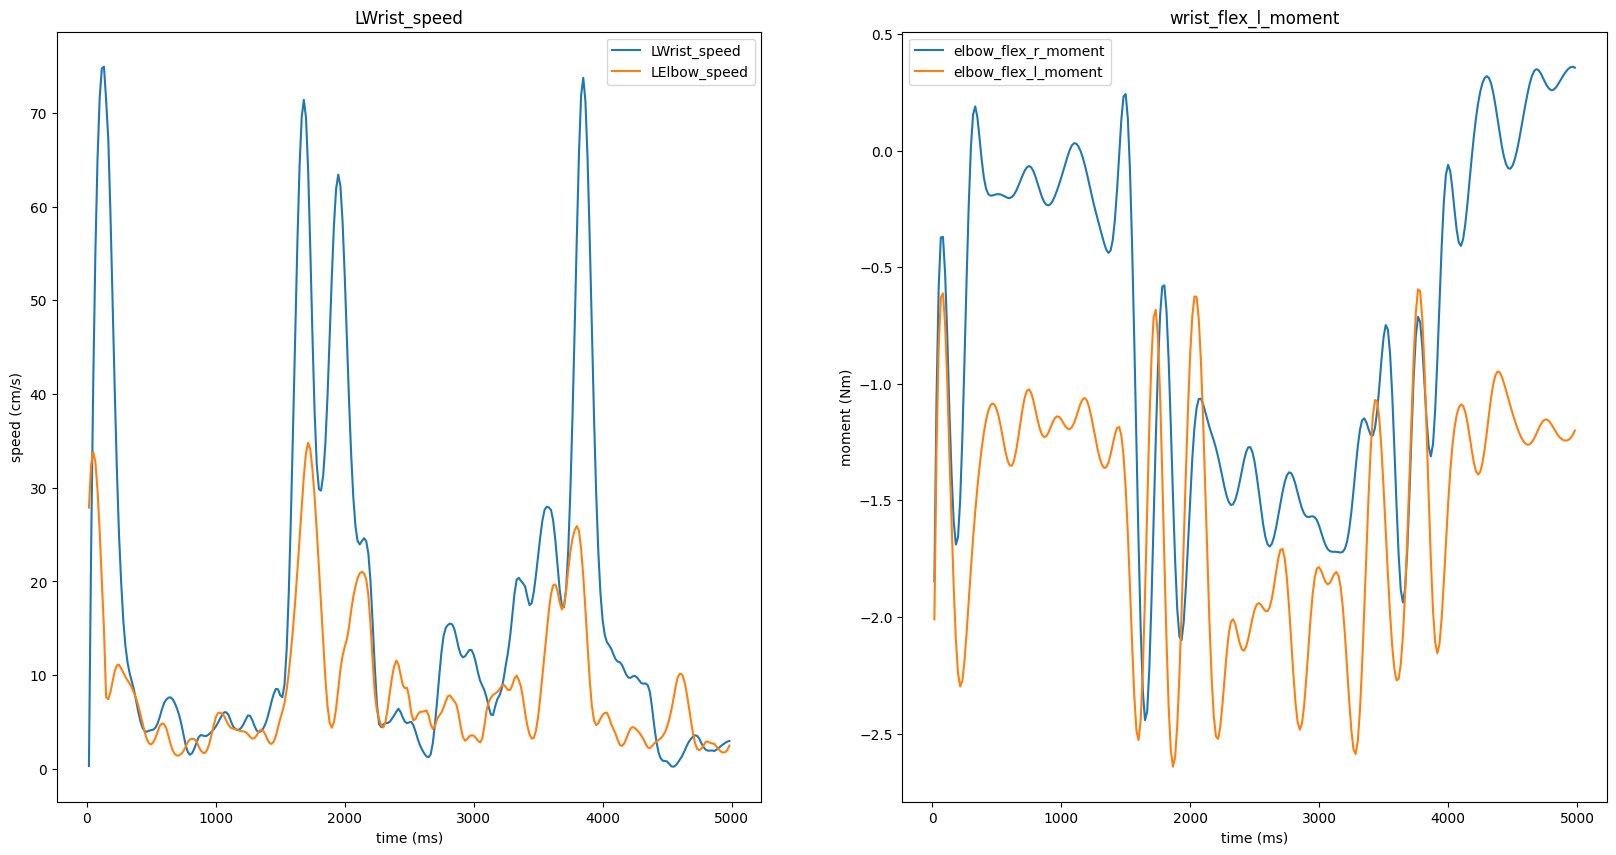

In [37]:

import matplotlib.pyplot as plt

# load in one id and mt file with the same trialid

idfiles = glob.glob(MTfolder_processed + '/id*.csv')
print(idfiles)
mtfiles = glob.glob(MTfolder_processed + '/mt*.csv')
print(mtfiles)

id = pd.read_csv(idfiles[0])
mt = pd.read_csv(mtfiles[0])

# plot LWrist_speed from mt and wrist_flex_l_moment from id, on the left side measures of speed, on the right side measures of moment
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(mt['Time'], mt['LWrist_speed'], label='LWrist_speed')
# add LElbow_speed
ax[0].plot(mt['Time'], mt['LElbow_speed'], label='LElbow_speed')
ax[0].set_title('LWrist_speed')
ax[0].set_ylabel('speed (cm/s)')
ax[0].set_xlabel('time (ms)')
ax[0].legend()

ax[1].plot(id['time'], id['elbow_flex_r_moment'], label='elbow_flex_r_moment')
# add the same but smoothed
# add elbow flexion
ax[1].plot(id['time'], id['elbow_flex_l_moment'], label='elbow_flex_l_moment')
# smoothed
ax[1].set_title('wrist_flex_l_moment')
ax[1].set_ylabel('moment (Nm)')
ax[1].set_xlabel('time (ms)')
ax[1].legend()

plt.show()

# Peak detection - work in progress

In [64]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths

# find peaks in the speed
peakcols = [x for x in samplecopy.columns if 'speed' in x]

for col in peakcols:
    # find peaks
    peaks, _ = find_peaks(samplecopy[col], height=15)
    # add peaks to the dataframe
    samplecopy[col + '_peak'] = 0
    samplecopy.loc[peaks, col + '_peak'] = 1
    # find widths

    widths_7 = peak_widths(samplecopy[col], peaks, rel_height=0.7)
    widths_5 = peak_widths(samplecopy[col], peaks, rel_height=0.5)
    widths_3 = peak_widths(samplecopy[col], peaks, rel_height=0.3)
    widths_1 = peak_widths(samplecopy[col], peaks, rel_height=1)
    break
    # add widths to the dataframe
    samplecopy[col + '_width'] = widths[0]


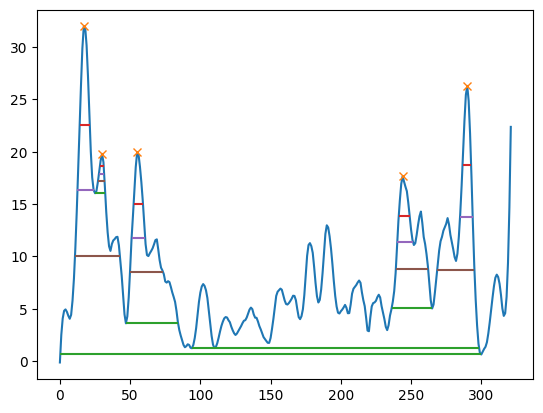

In [65]:
import matplotlib.pyplot as plt

x = samplecopy[col]

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*widths_1[1:], color="C2")
plt.hlines(*widths_3[1:], color="C3")
plt.hlines(*widths_5[1:], color="C4")
plt.hlines(*widths_7[1:], color="C5")
plt.show()

# Acoustics

### Packages

In [68]:
# data wrangle
import glob
import numpy as np
import pandas as pd

# audio processing
from scipy.signal import hilbert
from scipy.interpolate import interp1d
import librosa
import parselmouth

# plotting
import matplotlib.pyplot as plt
import IPython.display as ipd

### Folders

In [66]:
actotrack = glob.glob(ACfolder + "/*.wav", recursive=True)
print(actotrack)

# get rid of the first file because it's not good
actotrack = actotrack[1:]

    


['E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_1_Mic_nominal_srate48000_p0_dansen_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_10_Mic_nominal_srate48000_p1_auto_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_18_Mic_nominal_srate48000_p0_snel_combinatie_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_trial_2_Mic_nominal_srate48000_p0_bitter_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_trial_8_Mic_nominal_srate48000_p0_walgen_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_9_Mic_nominal_srate48000_p1_langzaam_geluiden_corrected.wav', 'E:\\charade_experi

In [69]:
# audio sample
sample = actotrack[0]

ipd.Audio(sample)

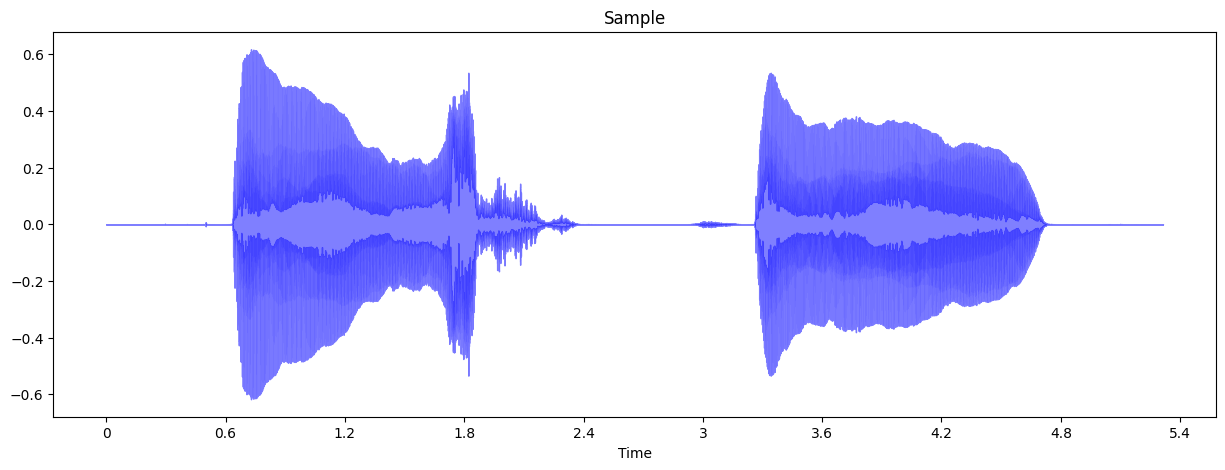

In [70]:
# visualize the waveform
# from https://www.youtube.com/watch?v=rlypsap6Wow

samp, sr = librosa.load(actotrack[0])

plt.figure(figsize=(15, 17))
plt.subplot(3, 1, 1)
librosa.display.waveshow(samp, color='blue', alpha=0.5)   
plt.title('Sample')
plt.show()


### Amplitude envelope (vocalic energy)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import librosa
import librosa.display

# Define the bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filtfilt(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Define the lowpass filter
def butter_lowpass(cutoff, fs, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low')
    return b, a

def butter_lowpass_filtfilt(data, cutoff, fs, order=2):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Function to extract amplitude envelope
def amp_envelope(audiofilename):
    # load audio with librosa
    audio, sr = librosa.load(audiofilename, sr=None, mono=True)
    # Bandpass filter 400-4000Hz
    data = butter_bandpass_filtfilt(audio, 400, 4000, sr, order=2)
    # Lowpass filter 10Hz
    data = butter_lowpass_filtfilt(np.abs(data), 10, sr, order=2)
    # scale from 0 to 1
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data, sr


E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_10_Mic_nominal_srate48000_p1_auto_geluiden_corrected.wav
255093
255093


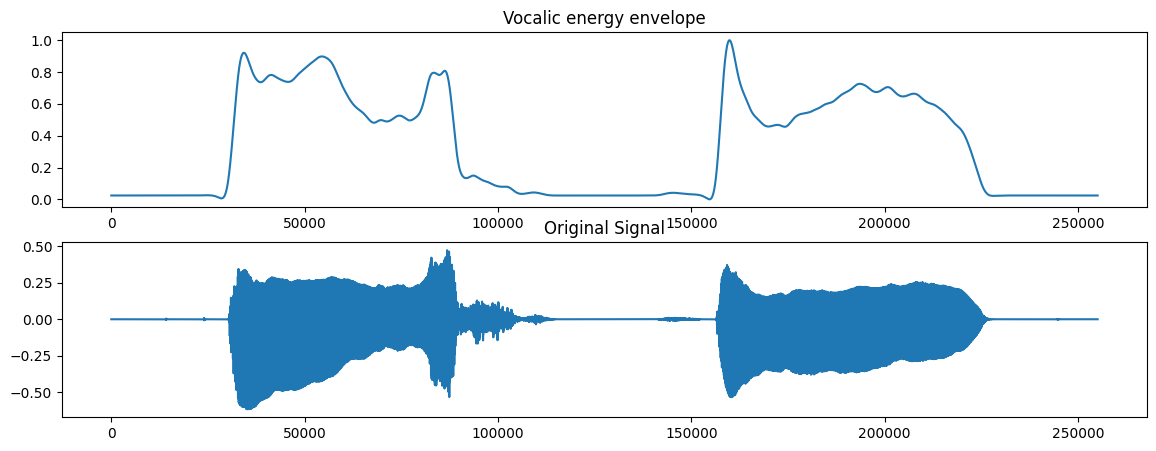

In [71]:
# Get the amplitude envelope
audiofilename = actotrack[0]
print(audiofilename)
ampv, sr = amp_envelope(audiofilename)
print(len(ampv))
# Plot the filtered signal and the original signal
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
plt.plot(ampv)
plt.title('Vocalic energy envelope')

# Extract and plot the original signal
rawaudio, sr = librosa.load(audiofilename, sr=None)
print(len(rawaudio))
plt.subplot(2, 1, 2)
plt.plot(rawaudio)
plt.title('Original Signal')
plt.show()

In [16]:
actotrack = glob.glob(ACfolder + "*/*.wav", recursive=True)

# get rid of the first file - faulty
actotrack = actotrack[1:]
print(actotrack)

# Loop over wav files
for audiofile in actotrack:

    print('working on ' + audiofile)

    # get the trialid
    trialid = audiofile.split('\\')[-1].split('.')[0]
    #trial id is the first, second, fourth and eighth element
    trialid = '_'.join(trialid.split('_')[0:1] + trialid.split('_')[1:2] + trialid.split('_')[3:4] + trialid.split('_')[7:8])
    # apply the function
    ampv, sr = amp_envelope(audiofile)

    # Extract and plot the original signal
    rawaudio, sr = librosa.load(audiofile, sr=None)

    # create a time vector
    time_env = np.arange(0, len(rawaudio)/sr, 1/sr)
    
    # Ensure the lengths match by padding ampv if necessary
    if len(ampv) < len(time_env):
        ampv = np.pad(ampv, (0, len(time_env) - len(ampv)), mode='constant')
    elif len(ampv) > len(time_env):
        ampv = ampv[:len(time_env)]

    # the same for rawaudio
    if len(rawaudio) < len(time_env):
        rawaudio = np.pad(rawaudio, (0, len(time_env) - len(rawaudio)), mode='constant')
    elif len(rawaudio) > len(time_env):
        rawaudio = rawaudio[:len(time_env)]
    
    # save the audio and envelope in a pandas with time in seconds
    try:
        audio = pd.DataFrame({'time': time_env, 'audio': rawaudio, 'envelope': ampv, 'trialID': trialid})
        # convert time to ms
        audio['time'] = audio['time'] * 1000

        # write as csv
        audio.to_csv(ACfolder_processed + '/env_' + trialid + '.csv', index=False)
    except ValueError:
        print('ValueError: ' + trialid)
        continue


    

['E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_10_Mic_nominal_srate48000_p1_auto_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_18_Mic_nominal_srate48000_p0_snel_combinatie_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_trial_2_Mic_nominal_srate48000_p0_bitter_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_trial_8_Mic_nominal_srate48000_p0_walgen_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_9_Mic_nominal_srate48000_p1_langzaam_geluiden_corrected.wav', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\Audio_48\\0_1_pr_0_Mic_nominal_srate48000_p0_bloem_geluiden.wav', 'E:\\charade_experiment_WORKSP

### Pitch 

In [53]:
import numpy as np
import parselmouth

def extract_f0(locationsound):
    # read the sound file into Python
    snd = parselmouth.Sound(locationsound)

    pitch = snd.to_pitch()
    f0_values = pitch.selected_array['frequency']

    return snd, f0_values

In [54]:
# create an empty list to store the results
#f0_list = []

resampl_rate = 200
freq=48000    

# Loop over wav files
for audiofile in actotrack:
    print('working on ' + audiofile)

    # get the trialid
    trialid = audiofile.split('\\')[-1].split('.')[0]
    #trial id is the first, second, fourth and eighth element
    trialid = '_'.join(trialid.split('_')[0:1] + trialid.split('_')[1:2] + trialid.split('_')[3:4] + trialid.split('_')[7:8])

    # apply the function
    snd, f0 = extract_f0(audiofile)

    length = len(f0)

    # replace 0 values with NaN
    f0 = np.where(f0 == 0, np.nan, f0)

    # create time vector
    F0_time = np.linspace(0, snd.duration, len(f0)) * 1000  # Generate time vector

    # create df
    f0_df = pd.DataFrame({'time_ms': F0_time, 'f0': f0, 'ID': trialid})

    # write as csv
    f0_df.to_csv(ACfolder_processed + '/f0_' + trialid + '.csv', index=False)


working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_10_Mic_nominal_srate48000_p1_auto_geluiden_corrected.wav
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_18_Mic_nominal_srate48000_p0_snel_combinatie_corrected.wav
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_2_Mic_nominal_srate48000_p0_bitter_geluiden_corrected.wav
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_trial_8_Mic_nominal_srate48000_p0_walgen_geluiden_corrected.wav
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_9_Mic_nominal_srate48000_p1_langzaam_geluiden_corrected.wav
working on E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials\Audio_48\0_1_pr_0_Mic_nominal_srate48000_p0_bloem_geluiden.wav
working on E:\charade_exp

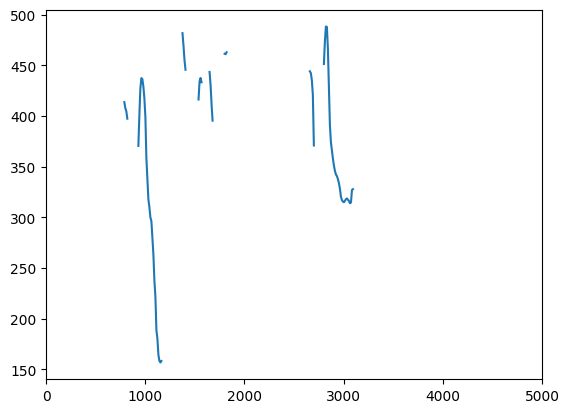

In [56]:
# plot to check
plt.plot(f0_df['time_ms'], f0_df['f0'])
plt.xlim(0, 5000)
plt.show()

### Some additional features

In [77]:
def extract_sound_features(locationsound):
    # read the sound file into Python
    snd = parselmouth.Sound(locationsound)

    intensity = snd.to_intensity()
    spectogram = snd.to_spectrogram()
    pitch = snd.to_pitch()

    return snd, intensity, spectogram, pitch

In [78]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")
    
def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")


def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='blue')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")


In [79]:
# loop over the audio files and extract the features

# create an empty list to store the results
features_list = []

# Loop over wav files
for audiofile in actotrack:
    print('working on ' + audiofile)
    # get the trialid
    trialid = audiofile.split('\\')[-1].split('.')[0]
    #trial id is the first, second, fourth and eighth element
    trialid = '_'.join(trialid.split('_')[0:1] + trialid.split('_')[1:2] + trialid.split('_')[3:4] + trialid.split('_')[7:8])
    # apply the function
    snd, intensity, spectogram, pitch = extract_sound_features(audiofile)

    # create df
    features = pd.DataFrame({'intensity': [intensity], 'spectogram': [spectogram], 'pitch': [pitch], 'ID': trialid})

    # store the df in the list with filename
    features_list.append(features)

# combine all dfs in the list to one df
features_combined = pd.concat(features_list, ignore_index=True)

AttributeError: 'Series' object has no attribute 'x_grid'

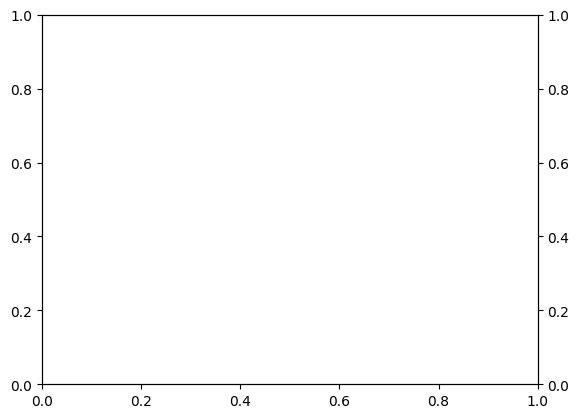

In [91]:
# pick random row as sample
sample_feat = features_list[0]

plt.figure()
plt.twinx()
draw_spectrogram(sample_feat['spectogram'])
draw_pitch(sample_feat['pitch'])
#draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show()


# Balance Board



### Folders

In [15]:
# in BBfolder, find all files containing BalanceBoard

BB_files = glob.glob(BBfolder + '*BalanceBoard*.csv', recursive=True)
print(BB_files)


['E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_pr_1_BalanceBoard_stream_nominal_srate500_p0_dansen_geluiden_corrected.csv', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_pr_10_BalanceBoard_stream_nominal_srate500_p1_auto_geluiden_corrected.csv', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_pr_18_BalanceBoard_stream_nominal_srate500_p0_snel_combinatie_corrected.csv', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_trial_2_BalanceBoard_stream_nominal_srate500_p0_bitter_geluiden_corrected.csv', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_trial_8_BalanceBoard_stream_nominal_srate500_p0_walgen_geluiden_corrected.csv', 'E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials\\0_1_pr_9_BalanceBoard_stream_nominal_srate500_p1_langzaam_geluiden_corrected.c

### COP

In [16]:
for bb in BB_files:

    # get trialid
    trialid = bb.split('\\')[-1].split('.')[0]
    # get the first, second, fourth, nineth elements
    trialid = '_'.join(trialid.split('_')[:2] + trialid.split('_')[3:4] + trialid.split('_')[8:9])

    # Load the balanceboard data
    df_bb = pd.read_csv(bb)

    # Rename columns
    df_bb.columns = ['time_s', 'left_back', 'right_forward', 'right_back', 'left_forward']

    # Calculate sampling rate
    bbsamp = 1 / np.mean(np.diff(df_bb['time_s'] - min(df_bb['time_s'])))

    # Apply Savitzky-Golay filter to smooth the data
    for col in df_bb.columns[1:]:
        df_bb[col] = scipy.signal.savgol_filter(df_bb[col], 51, 5)

    # Calculate COPX and COPY
    COPX = (df_bb['right_forward'] + df_bb['right_back']) - (df_bb['left_forward'] + df_bb['left_back'])
    COPY = (df_bb['right_forward'] + df_bb['left_forward']) - (df_bb['left_back'] + df_bb['right_back'])

    # Calculate COPXc and COPYc
    df_bb['COPXc'] = scipy.signal.savgol_filter(np.insert(np.diff(COPX), 0, 0), 51, 5)
    df_bb['COPYc'] = scipy.signal.savgol_filter(np.insert(np.diff(COPY), 0, 0), 51, 5)

    # Calculate COPc
    df_bb['COPc'] = np.sqrt(df_bb['COPXc']**2 + df_bb['COPYc']**2)

    # restart the time so that starts from 0
    df_bb['time_s'] = df_bb['time_s'] - min(df_bb['time_s'])
    # convert to ms
    df_bb['time_s'] = df_bb['time_s']*1000

    # rename time_s to time
    df_bb.rename(columns={'time_s': 'time'}, inplace=True)

    # Add trialid
    df_bb['TrialID'] = trialid

    # Write as csv to MTfolder_processed
    df_bb.to_csv(MTfolder_processed + '/bb_' + trialid + '.csv', index=False)


## Plot to check

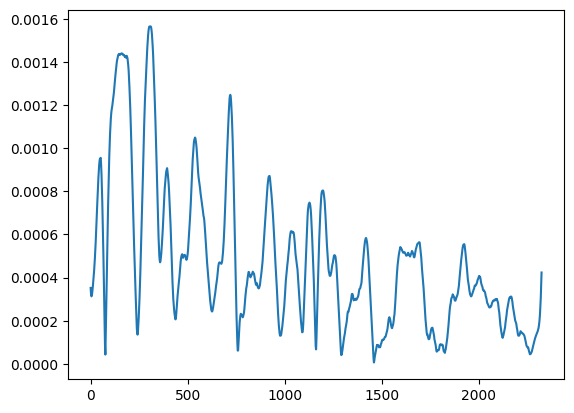

In [75]:
bbfiles = glob.glob(MTfolder_processed + '/bb*.csv')

samplebb = pd.read_csv(bbfiles[0])


# plot COPc the sample
plt.plot(samplebb['time'], samplebb['COPc'])
plt.show()


# Merging all

In [20]:
import glob


# from MTfolder_processed, load first files for bb, id, and mt

bbfiles = glob.glob(MTfolder_processed + '/bb*.csv')
idfiles = glob.glob(MTfolder_processed + '/id*.csv')
mtfiles = glob.glob(MTfolder_processed + '/mt*.csv')
envfiles = glob.glob(ACfolder_processed + '/env*.csv')
f0files = glob.glob(ACfolder_processed + '/f0*.csv')

# samples
samplebb = pd.read_csv(bbfiles[10])
# get trial id
trialid = samplebb['TrialID'][0]
print(trialid)
# find the same trialid in idfiles
sampleid = [x for x in idfiles if trialid in x]
sampleid = pd.read_csv(sampleid[0])
print(sampleid)

# find the same trialid in mtfiles
samplemt = [x for x in mtfiles if trialid in x]
samplemt = pd.read_csv(samplemt[0])
print(samplemt)

# find the same trialid in envfiles
sampleenv = [x for x in envfiles if trialid in x]
sampleenv = pd.read_csv(sampleenv[0])
print(sampleenv)

# find the same trialid in f0files
samplef0 = [x for x in f0files if trialid in x]
samplef0 = pd.read_csv(samplef0[0])
print(samplef0)

0_1_4_p0
          time  pelvis_tilt_moment  pelvis_list_moment  \
0      16.6575           -1.605314           64.824943   
1      33.3241           -3.006767           66.934752   
2      49.9907           -3.902547           68.260659   
3      66.6573           -4.350948           68.915933   
4      83.3239           -4.410262           69.013848   
..         ...                 ...                 ...   
271  4533.3061            1.160171           63.196001   
272  4549.9727            0.930820           63.796527   
273  4566.6393            0.226522           64.645472   
274  4583.3059           -1.019905           65.696920   
275  4599.9725           -2.875643           66.904958   

     pelvis_rotation_moment  pelvis_tx_force  pelvis_ty_force  \
0                 -5.026390         4.160797       630.571087   
1                 -5.845326        -6.696801       628.558091   
2                 -6.351473       -13.084904       626.453121   
3                 -6.579056       

In [21]:
# what is sampling rate of each

# bb
bbsr = 1 / np.mean(np.diff(samplebb['time']))*1000
print('bb sr: ' + str(bbsr))

# id
idsr = 1 / np.mean(np.diff(sampleid['time']))*1000
print('id sr: ' + str(idsr))

# mt
mtsr = 1 / np.mean(np.diff(samplemt['Time']))*1000
print('mt sr: ' + str(mtsr))
# rename Time to time
samplemt.rename(columns={'Time': 'time'}, inplace=True)

# env
envsr = 1 / np.mean(np.diff(sampleenv['time']))*1000
print('env sr: ' + str(envsr))
# rename trialID to TrialID
sampleenv.rename(columns={'trialID': 'TrialID'}, inplace=True)

# f0
f0sr = 1 / np.mean(np.diff(samplef0['time_ms']))*1000
print('f0 sr: ' + str(f0sr))
#rename time_ms to time
samplef0.rename(columns={'time_ms': 'time'}, inplace=True)
# rename ID to TrialID
samplef0.rename(columns={'ID': 'TrialID'}, inplace=True)



bb sr: 499.9869228393828
id sr: 60.000240000960005
mt sr: 60.000000000000135
env sr: 47999.99999999999
f0 sr: 98.99408364133598


In [51]:
from scipy.interpolate import interp1d

desired_sr = 500    

samples = [samplebb, sampleid, samplemt, sampleenv, samplef0]
samples_interp = []

for s in samples:
    # create a df that copies the time from bb but has sampling rate 500
    time_new = np.arange(0, max(s['time']), 1/desired_sr)
    trialid = s['TrialID'][0]

    # interpolate all columns in samplebb except of the first and last
    s_interp = pd.DataFrame()

    colstoint = s.columns
    # get rid of time and trialid
    colstoint = [x for x in colstoint if 'time' not in x]
    colstoint = [x for x in colstoint if 'TrialID' not in x]

    # get rid of 
    for col in colstoint:
        # Interpolation function
        interp_func = interp1d(s['time'], s[col], kind='linear', fill_value="interpolate")
        # Interpolate the data
        s_interp[col] = interp_func(time_new)

    # add trialid and time
    s_interp['TrialID'] = trialid
    s_interp['time'] = time_new

    # append to the list
    samples_interp.append(s_interp)




ValueError: A value (0.0) in x_new is below the interpolation range's minimum value (16.6575).

In [59]:
# merge samples_interp[0] with original sampleenv

bb = samples_interp[0]
env = sampleenv
id = sampleid

# merge
bbid = pd.merge(bb, id, on=['time', 'TrialID'], how='outer')

TODO

- pad MT+ID so that it starts with 0
- merge all


In [60]:
bbid

,left_back,right_forward,right_back,left_forward,COPXc,COPYc,COPc,TrialID,time,pelvis_tilt_moment,...,arm_add_l_moment,arm_rot_l_moment,elbow_flex_r_moment,elbow_flex_l_moment,pro_sup_r_moment,pro_sup_l_moment,wrist_flex_r_moment,wrist_dev_r_moment,wrist_flex_l_moment,wrist_dev_l_moment
0,1.128214,0.801654,1.565024,1.311175,-0.000111,0.000342,0.000360,0_1_4_p0,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.128213,0.801654,1.565024,1.311175,-0.000111,0.000342,0.000360,0_1_4_p0,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.128213,0.801654,1.565024,1.311175,-0.000111,0.000342,0.000360,0_1_4_p0,0.004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.128213,0.801654,1.565023,1.311175,-0.000111,0.000342,0.000360,0_1_4_p0,0.006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.128213,0.801654,1.565023,1.311175,-0.000111,0.000342,0.000359,0_1_4_p0,0.008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307332,1.144472,0.793816,1.579983,1.308063,0.000647,0.000151,0.000664,0_1_4_p0,4614.112,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307333,1.144472,0.793816,1.579983,1.308064,0.000647,0.000151,0.000664,0_1_4_p0,4614.114,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307334,1.144472,0.793817,1.579983,1.308064,0.000647,0.000151,0.000665,0_1_4_p0,4614.116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307335,1.144472,0.793817,1.579984,1.308064,0.000647,0.000151,0.000665,0_1_4_p0,4614.118,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# what is the sr of eeach sample in samples_interp

for s in samples_interp:
    sr = 1 / np.mean(np.diff(s['time']))
    print('sr: ' + str(sr))


sr: 500.0
sr: 500.0
sr: 500.0
sr: 500.0
sr: 500.0


In [46]:
# merge them all
df = pd.merge(samples_interp[0], samples_interp[1], on=['time', 'TrialID'], how='outer')

In [48]:
df

,left_back,right_forward,right_back,left_forward,COPXc,COPYc,COPc,TrialID,time,pelvis_tilt_moment,...,arm_add_l_moment,arm_rot_l_moment,elbow_flex_r_moment,elbow_flex_l_moment,pro_sup_r_moment,pro_sup_l_moment,wrist_flex_r_moment,wrist_dev_r_moment,wrist_flex_l_moment,wrist_dev_l_moment
0,1.128214,0.801654,1.565024,1.311175,-0.000111,0.000342,0.000360,0_1_4_p0,0.000,-0.204626,...,-0.929740,1.777839,-0.284356,-1.390833,0.065879,0.092875,0.216713,0.077000,0.186243,0.206122
1,1.128213,0.801654,1.565024,1.311175,-0.000111,0.000342,0.000360,0_1_4_p0,0.002,-0.204794,...,-0.929706,1.777799,-0.284359,-1.390787,0.065880,0.092872,0.216714,0.077000,0.186238,0.206114
2,1.128213,0.801654,1.565024,1.311175,-0.000111,0.000342,0.000360,0_1_4_p0,0.004,-0.204962,...,-0.929673,1.777759,-0.284363,-1.390740,0.065880,0.092869,0.216714,0.077001,0.186233,0.206106
3,1.128213,0.801654,1.565023,1.311175,-0.000111,0.000342,0.000360,0_1_4_p0,0.006,-0.205131,...,-0.929640,1.777719,-0.284366,-1.390694,0.065880,0.092866,0.216715,0.077002,0.186227,0.206098
4,1.128213,0.801654,1.565023,1.311175,-0.000111,0.000342,0.000359,0_1_4_p0,0.008,-0.205299,...,-0.929607,1.777679,-0.284370,-1.390648,0.065880,0.092862,0.216715,0.077003,0.186222,0.206090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307056,1.144472,0.793816,1.579983,1.308063,0.000647,0.000151,0.000664,0_1_4_p0,4614.112,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307057,1.144472,0.793816,1.579983,1.308064,0.000647,0.000151,0.000664,0_1_4_p0,4614.114,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307058,1.144472,0.793817,1.579983,1.308064,0.000647,0.000151,0.000665,0_1_4_p0,4614.116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307059,1.144472,0.793817,1.579984,1.308064,0.000647,0.000151,0.000665,0_1_4_p0,4614.118,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
